<a href="https://colab.research.google.com/github/elkinkazan/itis-2025-ai-tools/blob/main/Task7_UseChatGpt_Iliasova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# DO NOT MODIFY  !!!
# DO NOT EXECUTE !!!
!pip install --upgrade gspread pandas google-auth
import pandas as pd
import gspread
from google.colab import auth
from google.auth import default
from IPython.display import display
import random
# Authenticate and create the PyDrive client.
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [1]:
# FILL THIS
student_name = "ELVIRA ILIASOVA"
group_id = "11-101"

In [ ]:
# DO NOT MODIFY  !!!
# DO NOT EXECUTE !!!
SPREADSHEET_URL = "https://docs.google.com/spreadsheets/d/1Kfxj2eDFl7xQnXw7Fpb9bwghc65o8xf--VpNxrdWHaY/edit?gid=0#gid=0"
sh = gc.open_by_url(SPREADSHEET_URL)
worksheet = sh.sheet1

# Ensure header row exists
if not worksheet.get_all_values():
    worksheet.append_row(["Student Name", "Group","TaskID", "Score"])


# MAIN NOTEBOOK GOES HERE
task_id = "Task7_UseChatGpt"
score = 0
max_score = 15

### **Exercise Description: Image Preprocessing for Neural Network**

#### **Objective:**
The goal of this exercise is to preprocess images to match the background conditions of an existing neural network dataset. Since the neural network has been trained on images with a different background, we need to apply various background extraction and transformation techniques to adapt new images to the dataset style. This ensures that the model can work over new background. We can't train model.

#### **Steps Involved:**
1. **Load the Original Image:**
   - The image is read and converted into a suitable format for processing. Banana1.jpg from the model's dataset, banana_new.jpg from camera from the real environment

2. **Extract object from background from the real environment**
   - Use **AI-Based Background Removal (`rembg`)**: Utilizes a deep learning model to remove the background automatically.

3. **Extract object from background from the dataset image**
   - Use image segmentation technics.
   - Put the overall gray color on empty space.
   - Blur image.

4. **Put real environment object onto dataset background**
   - Take extracted objects.
   - Put over the background.

5. **Compare and Evaluate Results:**
   - Compare over model. It should show Banane.

6. **BONUS: before extracting object make image looks similar to each other to enhance confidence**
   - Use Gamma correction.
   - Use CLAHE

#### **Expected Outcome:**
- The final preprocessed images should closely match the background characteristics of the original dataset.
- Model should detect Banane.

This exercise is crucial for real-world applications where model performance depends on the consistency of input data. Let me know if you need additional modifications or explanations! 🚀

In [2]:
# 0 step preparation
import json
import numpy as np
from typing import List, Optional, Tuple, Callable

from typing import Dict, Optional
from dataclasses import dataclass, field

TAG_SEPARATOR = '#'
CODE_SEPARATOR = '.'



class ModelInfo:
	Name: str


class Subcode:
	Name: str
	Confidence: float


class Tag:
	Name: str
	Confidence: float


class ProductCode:
	Value: str
	Type: int = 3

@dataclass
class ProductPrediction:
	code: str
	confidence: float
	tags: Dict[str, float] = field(default_factory=dict)
	subcodes: Dict[str, float] = field(default_factory=dict)
	description: Optional[str] = None
	swapped_from: Optional[str] = None
	blocked: bool = False

	def __post_init__(self):
		self.description = self.description or self.code.replace('.', ' ').capitalize()


class LabelDecoder:
	def __init__(self, class_mapping_path: str, property_mapping_path: str):
		self.local_max_size = 10   #
		self.class_mapping: dict = self._load_mapping(class_mapping_path)
		self.property_mapping: dict = {}
		self.decode: Callable = self._decode_one_head_model


	@staticmethod
	def _load_mapping(filepath: str) -> dict:
		with open(filepath, 'r', encoding='utf-8') as file:
			return json.load(file)

	@staticmethod
	def split_classcode(code: str) -> Tuple[str, str, str]:
		code, *tags = code.split(TAG_SEPARATOR)
		code_parts: List[str] = code.split(CODE_SEPARATOR)
		subcode: Optional[str] = None
		code: str = CODE_SEPARATOR.join(code_parts)
		tags: Optional[str] = TAG_SEPARATOR.join(tags) or None
		return code, subcode, tags

	def _decode_one_head_model(self, model_output: List[np.ndarray]) -> List[ProductPrediction]:
		class_output: np.ndarray = model_output[0].squeeze().astype(float)
		# sort the output by the confidence by descending and take the top-N
		results: List[ProductPrediction] = []
		for class_index in class_output.argsort()[::-1][:self.local_max_size]:
			class_info: dict = self.class_mapping.get(str(class_index))
			name: str = class_info.get('name')
			code, subcode, tag = self.split_classcode(class_info.get('code'))
			results.append(ProductPrediction(code, class_output[class_index], description=name))
		return results

	def _decode_two_head_model(self, model_output: List[np.ndarray]) -> List[ProductPrediction]:
		class_output: np.ndarray = model_output[0].squeeze().astype(float)
		tags_output: np.ndarray = model_output[1].squeeze().astype(float)
		# mapping the tags name with their confidence (sorted)
		tags_conf = dict(sorted(zip(self.property_mapping, tags_output), key=lambda res: res[1], reverse=True))
		# sort the output by the confidence by descending and get N-top products in one line
		results: List[ProductPrediction] = []
		for class_index in class_output.argsort()[::-1][:self.local_max_size]:
			class_info: dict = self.class_mapping.get(str(class_index))
			name: str = class_info.get('name')
			code, subcode, tags = self.split_classcode(class_info.get('code'))
			results.append(ProductPrediction(code, class_output[class_index], tags=tags_conf, description=name))

		return results

Model loaded successfully!


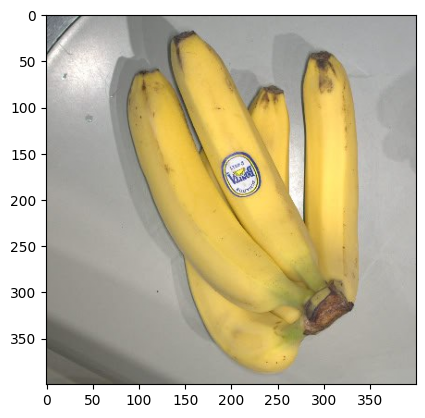

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Predictions: [ProductPrediction(code='BANANE', confidence=np.float64(0.9297972917556763), tags={}, subcodes={}, description='BANANE', swapped_from=None, blocked=False), ProductPrediction(code='MELON.SELECTION.FRANCE', confidence=np.float64(0.0034452471882104874), tags={}, subcodes={}, description='MELON.SELECTION.FRANCE', swapped_from=None, blocked=False), ProductPrediction(code='BANANE.DES.ANTILLES.HVE', confidence=np.float64(0.00316670723259449), tags={}, subcodes={}, description='BANANE.DES.ANTILLES.HVE', swapped_from=None, blocked=False), ProductPrediction(code='MANDARINE.ORRI', confidence=np.float64(0.0019960280042141676), tags={}, subcodes={}, description='MANDARINE.ORRI', swapped_from=None, blocked=False), ProductPrediction(code='NAVET.MARTEAU', confidence=np.float64(0.0017348193796351552), tags={}, subcodes={}, description='NAVET.MARTEAU', swapped_from=None, blocked=False), ProductPrediction(code='POMME.GALA.HVE.VRAC', confidence=np.float64(0.0014239511219784617), tags={}, subc

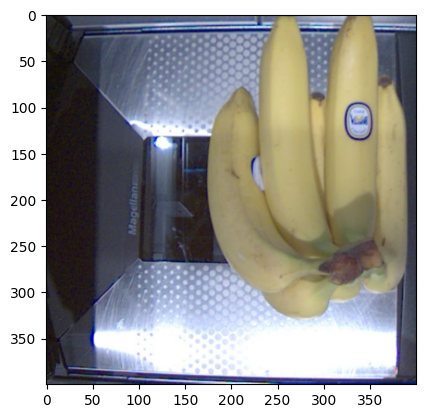

Predictions: [ProductPrediction(code='93020', confidence=np.float64(0.040830887854099274), tags={}, subcodes={}, description='93020', swapped_from=None, blocked=False), ProductPrediction(code='BANANE', confidence=np.float64(0.03303835913538933), tags={}, subcodes={}, description='BANANE', swapped_from=None, blocked=False), ProductPrediction(code='MANDARINE.ORRI', confidence=np.float64(0.03266546502709389), tags={}, subcodes={}, description='MANDARINE.ORRI', swapped_from=None, blocked=False), ProductPrediction(code='Avocat.gros.au.kg', confidence=np.float64(0.029685257002711296), tags={}, subcodes={}, description='Avocat.gros.au.kg', swapped_from=None, blocked=False), ProductPrediction(code='BANANE.DES.ANTILLES.HVE', confidence=np.float64(0.025682879611849785), tags={}, subcodes={}, description='BANANE.DES.ANTILLES.HVE', swapped_from=None, blocked=False), ProductPrediction(code='FIGUE.DE.BARBARIE', confidence=np.float64(0.02323048934340477), tags={}, subcodes={}, description='FIGUE.DE.B

In [3]:
# 0 step evaluate original images
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

# Function to download and load the model from GitHub
def load_custom_model(github_model_url):
    model_path = "custom_model.h5"

    # Download the model
    response = requests.get(github_model_url)
    with open(model_path, "wb") as f:
        f.write(response.content)

    # Load the model
    model = load_model(model_path)
    print("Model loaded successfully!")
    return model

def loadProperties():
    model_path = "class_mapping.json"
    # Download the model
    response = requests.get("https://github.com/alexander-toschev/mbzuai-course/raw/refs/heads/main/models/grey_plate/class_mapping.json")
    with open(model_path, "wb") as f:
        f.write(response.content)

    model_path = "property_mapping.json"
    response = requests.get("https://github.com/alexander-toschev/mbzuai-course/raw/refs/heads/main/models/grey_plate/property_mapping.json")
    with open(model_path, "wb") as f:
        f.write(response.content)

# Function to preprocess image from a URL
def preprocess_image(fileName,target_size=(400, 400)):
    image = Image.open(fileName).convert("RGB")
    image = image.resize(target_size)  # Resize image
    image = np.array(image) / 255.0  # Normalize
    plt.imshow(image)
    plt.show()
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    return image

# Function to run inference
def predict(model,  fileName, label_decoder):
    image = preprocess_image(fileName)
    predictions : List[np.ndarray] = model.predict(image, batch_size=None, verbose=0, steps=1)
    predictions = label_decoder.decode(predictions)
    return predictions

def download_image(url, filename):
    response = requests.get(url)
    with open(filename, "wb") as f:
        f.write(response.content)

# Replace this with your GitHub raw file URL
github_model_url = "https://github.com/alexander-toschev/mbzuai-course/raw/refs/heads/main/models/grey_plate/best_val_acc.h5"  # Change this to your .h5 model URL
github_image_url = "https://github.com/alexander-toschev/mbzuai-course/blob/main/images/Banana1.jpg?raw=true"  # Change this to your image URL
github_image_url_new = "https://github.com/alexander-toschev/mbzuai-course/blob/main/images/banana_new.jpg?raw=true"  # Change this to your image URL

download_image(github_image_url,"Banana1.jpg")
download_image(github_image_url_new,"banana_new.jpg")

# Load the model
model = load_custom_model(github_model_url)
loadProperties()
#predictiob and mappinbg
label_decoder = LabelDecoder("class_mapping.json", "property_mapping.json")

# Run prediction
#predictions = predict(model, github_image_url)
predictions = predict(model, "Banana1.jpg", label_decoder, )

# Display results
print("Predictions:", predictions)

# Run prediction
predictions = predict(model, "banana_new.jpg",label_decoder)



# Display results
print("Predictions:", predictions)



In [4]:
# 0 step install additional libraries
!pip install rembg
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.7 MB/s eta 0:00:00


In [5]:
import torch
import torchvision.transforms as T
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from rembg import remove



In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

# Load images
image1_path = "Banana1.jpg"
image2_path = "banana_new.jpg"

img1 = cv2.imread(image1_path)
img2 = cv2.imread(image2_path)

output_path = "Banana1_matched.jpg"
cv2.imwrite(output_path, img2)


True

2. **Extract object from background from the real environment**
   - Use **AI-Based Background Removal (`rembg`)**: Utilizes a deep learning model to remove the background automatically.

In [8]:
def remove_background():
    # Load image
    image_path = "Banana1_matched.jpg"
    image_pil = Image.open(image_path).convert("RGBA")  # важно: RGBA для альфа-канала

    # ✅ Remove background using rembg
    output_image = remove(image_pil)

    # Convert to OpenCV format for visualization
    output_np = np.array(output_image)
    output_cv = cv2.cvtColor(output_np, cv2.COLOR_RGBA2RGB)  # Удаляем альфу (фон уже прозрачный)

    # Display the result
    plt.figure(figsize=(10, 5))
    plt.imshow(output_cv)
    plt.axis("off")
    plt.title("Extracted Banana with AI Background Removal")
    plt.show()

    # Save the result
    output_path = "banana_from_target.png"
    cv2.imwrite(output_path, cv2.cvtColor(output_cv, cv2.COLOR_RGB2BGR))
    print(f"✅ Processed image saved at: {output_path}")

    return output_cv



100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 176GB/s]


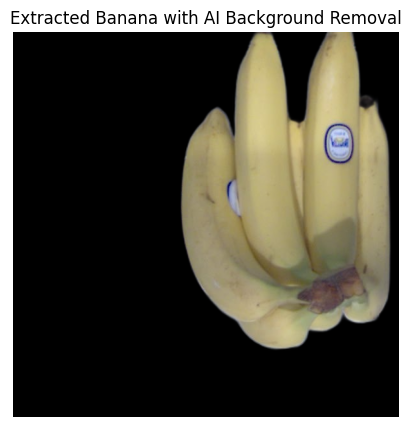

✅ Processed image saved at: banana_from_target.png
Image similarity score: 0.1326
Test passed: Similarity (0.1326) is below 0.5
Test passed: Background removal and image saving are successful.


In [9]:
# TEST THE METHOD
def compare_images(original, processed):
    if original.shape != processed.shape:
        print("Image dimensions do not match. Processing may have altered the size.")

    # Compute absolute difference
    diff = cv2.absdiff(original, processed)
    non_zero_count = np.count_nonzero(diff)
    similarity = 1 - (non_zero_count / diff.size)
    print(f"Image similarity score: {similarity:.4f}")

    return similarity

def assert_similarity_below_threshold(similarity, threshold=0.5):
    assert similarity < threshold, f"Test failed: Similarity ({similarity:.4f}) is not below {threshold}"
    print(f"Test passed: Similarity ({similarity:.4f}) is below {threshold}")

def test_background_removal():
    try:
        image_path = "Banana1_matched.jpg"
        output_cv = remove_background()

        # Load the original image for comparison
        original_image = cv2.imread(image_path)
        original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

        # Compare original and processed images
        similarity = compare_images(original_image, output_cv)
        assert_similarity_below_threshold(similarity)


        print("Test passed: Background removal and image saving are successful.")
    except Exception as e:
        print(f"Test failed: {e}")

# Run the test
if __name__ == "__main__":
    test_background_removal()

3. **Extract object from background from the dataset image**

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def prepare_background(image1):
    # Convert the first image to HSV for better segmentation
    hsv1 = cv2.cvtColor(image1, cv2.COLOR_BGR2HSV)

    # ✅ 1. Define a range for detecting the gray background
    lower_gray = np.array([0, 0, 50], dtype=np.uint8)
    upper_gray = np.array([180, 30, 220], dtype=np.uint8)

    # ✅ 2. Create a mask for the gray background
    bg_mask1 = cv2.inRange(hsv1, lower_gray, upper_gray)

    # ✅ 3. Extract the background using the mask
    background_extracted1 = cv2.bitwise_and(image1, image1, mask=bg_mask1)

    # Select a clean gray region from the background (adjust ROI if needed)
    roi_x, roi_y, roi_w, roi_h = 100, 100, 50, 50
    roi = background_extracted1[roi_y:roi_y + roi_h, roi_x:roi_x + roi_w]

    # Compute the average gray color of the region
    average_gray_color = np.mean(roi, axis=(0, 1)).astype(np.uint8)

    # Mask where background is too dark (close to black)
    black_mask = cv2.inRange(background_extracted1, (0, 0, 0), (30, 30, 30))

    # Replace black with average gray
    background_replaced = background_extracted1.copy()
    background_replaced[black_mask == 255] = average_gray_color

    # ✅ 4. Inpainting to smooth transitions
    background_final = cv2.inpaint(background_replaced, black_mask, inpaintRadius=15, flags=cv2.INPAINT_TELEA)

    # Convert for display
    background_final_rgb = cv2.cvtColor(background_final, cv2.COLOR_BGR2RGB)

    # Show result
    plt.figure(figsize=(10, 5))
    plt.imshow(background_final_rgb)
    plt.axis("off")
    plt.title("Refined Background with Proper Gray Fill")
    plt.show()

    # Save
    cv2.imwrite("refined_background.jpg", background_final)
    print("✅ Refined background saved as 'refined_background.jpg'")
    return background_final


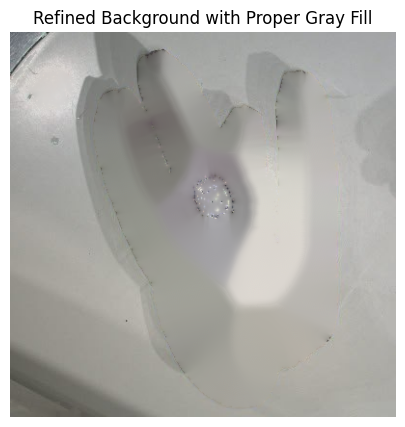

✅ Refined background saved as 'refined_background.jpg'
Black pixels in image 1: 102
Black pixels in image 2: 6
Test passed: Black pixel difference (0.9412) is bigger than threshold 0.7
Test passed: Background preparation is successful.


In [12]:
# TEST METHOD
def count_black_pixels(image):
    return np.sum(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) < 54)

def assert_black_pixel_difference(image1, image2, threshold=0.7):
    black_pixels_1 = count_black_pixels(image1)
    black_pixels_2 = count_black_pixels(image2)
    print(f"Black pixels in image 1: {black_pixels_1}")
    print(f"Black pixels in image 2: {black_pixels_2}")
    difference = abs(black_pixels_2 - black_pixels_1) / max(black_pixels_1, black_pixels_2)
    assert difference > threshold, f"Black pixel difference ({difference:.4f}) exceeds threshold {threshold}"
    print(f"Test passed: Black pixel difference ({difference:.4f}) is bigger than threshold {threshold}")

def test_background_preparation():
    try:
        # Load the extracted background image
        image1_path = "Banana1.jpg"
        image_loaded = cv2.imread(image1_path)


        # Prepare the background
        background_final = prepare_background(image_loaded)
        assert_black_pixel_difference(image_loaded, background_final)


        print("Test passed: Background preparation is successful.")
    except Exception as e:
        print(f"Test failed: {e}")

# Run the test
if __name__ == "__main__":
    test_background_preparation()


4. **Put real environment object onto dataset background**
   - Take extracted objects.
   - Put over the background.

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_image_to_background():
    # Load refined background and extracted foreground image
    background_path = "refined_background.jpg"
    foreground_path = "banana_from_target.png"

    background = cv2.imread(background_path)
    foreground = cv2.imread(foreground_path)

    # ✅ Resize the foreground to match the background size
    foreground = cv2.resize(foreground, (background.shape[1], background.shape[0]))

    # Convert foreground to grayscale and create a binary mask
    foreground_gray = cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(foreground_gray, 10, 255, cv2.THRESH_BINARY)
    mask_inv = cv2.bitwise_not(mask)

    # ✅ Extract the foreground object
    fg = cv2.bitwise_and(foreground, foreground, mask=mask)

    # Extract the background area where the foreground will be placed
    bg = cv2.bitwise_and(background, background, mask=mask_inv)

    # Combine the foreground with the background
    result = cv2.add(bg, fg)

    # Convert to RGB for visualization
    result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

    # Display the final composited image
    plt.figure(figsize=(10, 5))
    plt.imshow(result_rgb)
    plt.axis("off")
    plt.title("Foreground Placed on Refined Background")
    plt.show()

    # Save the final composited image
    cv2.imwrite("final_composite.jpg", result)
    print("✅ Final composite saved as 'final_composite.jpg'")


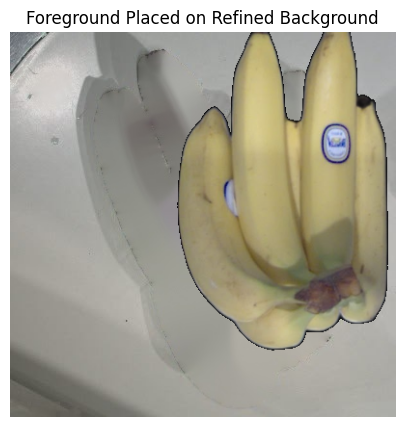

✅ Final composite saved as 'final_composite.jpg'
Test passed: Banana on the image (25.5194)


In [15]:
from PIL import Image
import numpy as np
# TEST METHOD


def calculate_yellow_percentage(image_path):
    # Load the image
    image = Image.open(image_path)

    # Convert image to numpy array
    image_array = np.array(image)

    # Define yellow color range in RGB
    lower_yellow = np.array([150, 150, 0])  # Loose lower bound for yellow
    upper_yellow = np.array([255, 255, 150])  # Loose upper bound for yellow

    # Create a mask for yellow pixels
    yellow_mask = ((image_array[:, :, 0] >= lower_yellow[0]) & (image_array[:, :, 0] <= upper_yellow[0]) &
                   (image_array[:, :, 1] >= lower_yellow[1]) & (image_array[:, :, 1] <= upper_yellow[1]) &
                   (image_array[:, :, 2] >= lower_yellow[2]) & (image_array[:, :, 2] <= upper_yellow[2]))

    # Calculate the percentage of yellow pixels in the image
    yellow_percentage = (np.sum(yellow_mask) / yellow_mask.size) * 100

    return yellow_percentage




def assert_combine_images(image_path):
    result = calculate_yellow_percentage(image_path)
    assert result > 19, f"Banana is not on image ({result:.4f}) "
    print(f"Test passed: Banana on the image ({result:.4f})")

def test_combine_images():
    try:
        # Load the extracted background image
        image1_path = "final_composite.jpg"
        add_image_to_background()
        assert_combine_images(image1_path)

    except Exception as e:
        print(f"Test failed: {e}")

# Run the test
if __name__ == "__main__":
    test_combine_images()

5. **Compare and Evaluate Results:**
   - Compare over model. It should show Banane.

In [16]:
def check_image(image_path):
    # ✅ Предсказание модели (1 строка)
    predictions = predict(model, image_path, label_decoder)

    # Вывод результата
    print("📊 Predictions:", predictions)
    return predictions


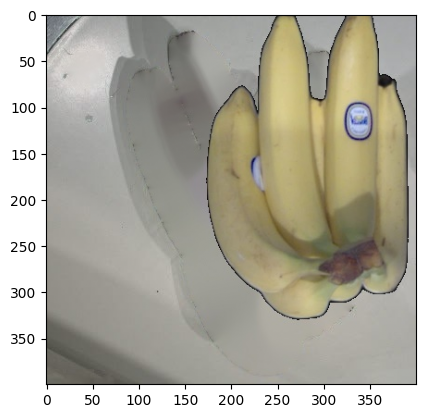

📊 Predictions: [ProductPrediction(code='BANANE', confidence=np.float64(0.0874839723110199), tags={}, subcodes={}, description='BANANE', swapped_from=None, blocked=False), ProductPrediction(code='BANANE.DES.ANTILLES.HVE', confidence=np.float64(0.05100351572036743), tags={}, subcodes={}, description='BANANE.DES.ANTILLES.HVE', swapped_from=None, blocked=False), ProductPrediction(code='NAVET.MARTEAU', confidence=np.float64(0.027537241578102112), tags={}, subcodes={}, description='NAVET.MARTEAU', swapped_from=None, blocked=False), ProductPrediction(code='CELERI.RAVE', confidence=np.float64(0.0174079742282629), tags={}, subcodes={}, description='CELERI.RAVE', swapped_from=None, blocked=False), ProductPrediction(code='MANDARINE.ORRI', confidence=np.float64(0.016863495111465454), tags={}, subcodes={}, description='MANDARINE.ORRI', swapped_from=None, blocked=False), ProductPrediction(code='POIVRON.JAUNE', confidence=np.float64(0.016724126413464546), tags={}, subcodes={}, description='POIVRON.JA

In [17]:
def assert_check_images(pp):
    print(pp)
    assert not len(pp[0].code.lower())!=6, f"Banane is not detected ({pp[0].code}) "
    print(f"Test passed: Banane detected ({pp[0].code})")

def test_combine_images():
    try:
        # Load the extracted background image
        image1_path = "final_composite.jpg"
        predictions = check_image(image1_path)
        assert_check_images(predictions)

    except Exception as e:
        print(f"Test failed: {e}")


# Run the test
if __name__ == "__main__":
    test_combine_images()

6. **BONUS: before extracting object make image looks similar to each other to enhance confidence**
   - Use Gamma correction.
   - Use CLAHE

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

### Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) ###
def apply_clahe(image):
    # Apply CLAHE method to image and return RESULT
    # Code starts HERE
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l = clahe.apply(l)
    lab = cv2.merge((l, a, b))
    # Code ends HERE
    return cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

### Gamma Correction ###
def estimate_gamma(image):
    # estimate gamma: средняя яркость нормализованная
    mean_intensity = np.mean(image) / 255.0
    return mean_intensity

def apply_gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(image, table)

def improve_images():
    # Load images
    image1_path = "Banana1.jpg"
    image2_path = "banana_new.jpg"

    img1 = cv2.imread(image1_path)
    img2 = cv2.imread(image2_path)

    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Estimate gamma from both images
    gamma1 = estimate_gamma(gray1)
    gamma2 = estimate_gamma(gray2)
    gamma_correction = gamma1 / gamma2

    # Apply gamma correction to image 2
    img2_gamma_corrected = apply_gamma_correction(img2, gamma_correction)
    plt.imshow(cv2.cvtColor(img2_gamma_corrected, cv2.COLOR_BGR2RGB))
    plt.title("After Gamma Correction")
    plt.axis("off")
    plt.show()

    # Apply CLAHE
    img2_final = apply_clahe(img2_gamma_corrected)

    # Save the final corrected image
    cv2.imwrite("image2_corrected.jpg", img2_final)

    # Display the adjusted image
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(img2_final, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Image 2 Adjusted with Gamma & CLAHE")
    plt.show()

    # Save the result
    output_path = "Banana1_matched.jpg"
    cv2.imwrite(output_path, img2_final)
    print(f"✅ Processed image saved at: {output_path}")


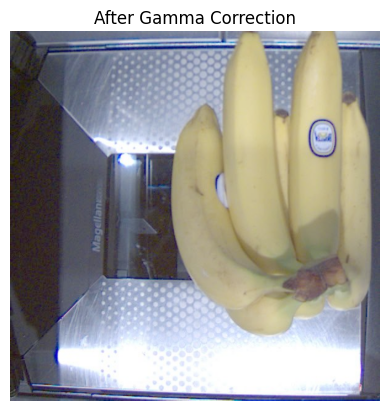

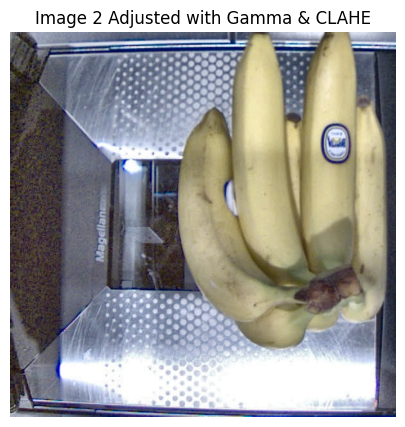

✅ Processed image saved at: Banana1_matched.jpg


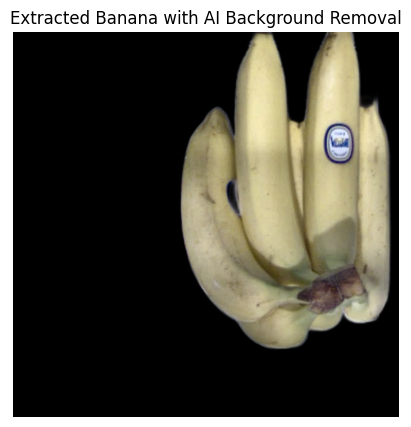

✅ Processed image saved at: banana_from_target.png


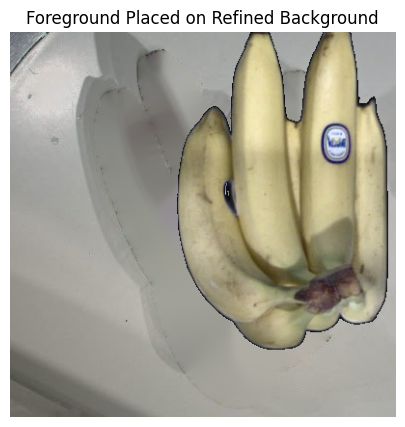

✅ Final composite saved as 'final_composite.jpg'


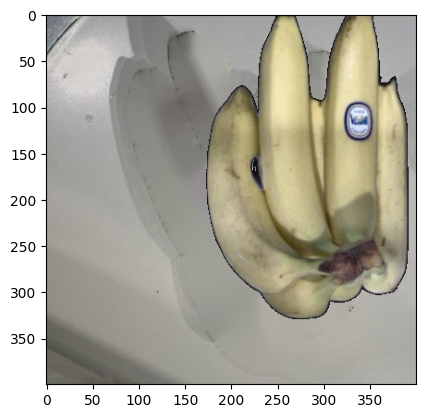

📊 Predictions: [ProductPrediction(code='BANANE', confidence=np.float64(0.11250904947519302), tags={}, subcodes={}, description='BANANE', swapped_from=None, blocked=False), ProductPrediction(code='AIL.VIOLET.FRANCE', confidence=np.float64(0.02694062516093254), tags={}, subcodes={}, description='AIL.VIOLET.FRANCE', swapped_from=None, blocked=False), ProductPrediction(code='CELERI.RAVE', confidence=np.float64(0.019974781200289726), tags={}, subcodes={}, description='CELERI.RAVE', swapped_from=None, blocked=False), ProductPrediction(code='CHAMPIGNON.GEANT', confidence=np.float64(0.017745425924658775), tags={}, subcodes={}, description='CHAMPIGNON.GEANT', swapped_from=None, blocked=False), ProductPrediction(code='MELON.SELECTION.FRANCE', confidence=np.float64(0.01730758510529995), tags={}, subcodes={}, description='MELON.SELECTION.FRANCE', swapped_from=None, blocked=False), ProductPrediction(code='NAVET.MARTEAU', confidence=np.float64(0.01626027747988701), tags={}, subcodes={}, description=

In [21]:
def assert_check_images(pp):
    print(pp)
    assert pp[0].confidence > 0.09, f"Confidence is low ({pp[0].confidence}) "
    score+=15
    print(f"Test passed: Confidence raised ({pp[0].confidence})")

def test_combine_images():
    try:

        image1_path = "final_composite.jpg"
        improve_images()
        remove_background()
        add_image_to_background()
        predictions = check_image(image1_path)
        assert_check_images(predictions)

    except Exception as e:
        print(f"Test failed: {e}")


# Run the test
if __name__ == "__main__":
    test_combine_images()

In [ ]:
# DO NOT MODIFY  !!!
# DO NOT EXECUTE !!!
# Save the result to Google Sheets
from datetime import datetime

# Get current date and time
now = datetime.now()
timestamp = now.strftime("%Y-%m-%d %H:%M:%S")
worksheet.append_row([student_name,group_id, task_id, score, timestamp])

print(f"Test completed! {student_name}, your score is {score}/{max_score}.")